<hr style="border:2px solid gray">

##### Author  : SIVA VIKNESH & YOUNES TATARI
##### Email   : siva.viknesh@sci.utah.edu / sivaviknesh14@gmail.com , younes.tatari@utah.edu/ younes.tatari@gmail.com
##### Address : SCI INSTITUTE, UNIVERSITY OF UTAH, SALT LAKE CITY, UTAH, USA 
<hr style="border:2px solid gray">

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import math
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.ticker as plticker
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]


np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True, precision=15)

ABC Flow
Paper: 


The flow differential equations are:

U component of the velocity
$$
\dot{x} = Asin(w1z) +Ccos(w2y)
$$
V component of the velocity
$$
\dot{y} = Bsin(w3x) + Acos(w4z)
$$

W component of the velocity
$$
\dot{z} = Csin(w5y) + Bcos(w6x)
$$


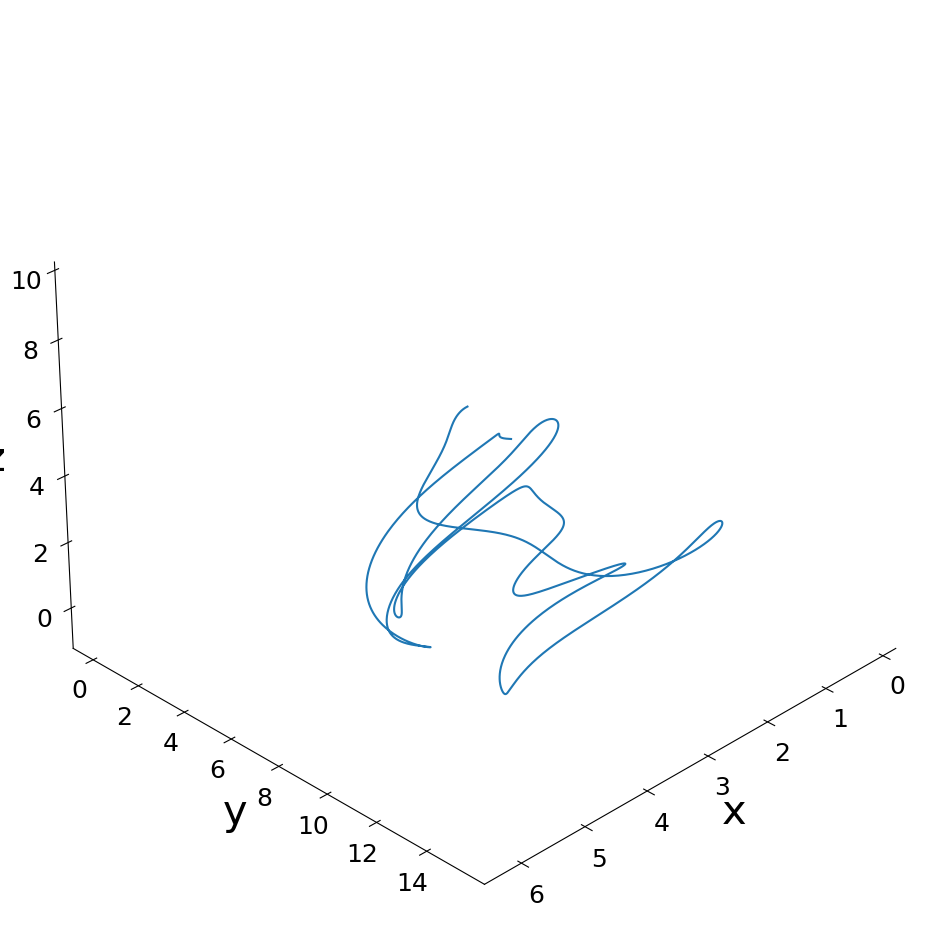

In [2]:
dt = 0.01
T = 20.0
t = np.arange(0,T+dt,dt)
A = 2.0
B = 3.0
C = 1.0

w1 =  np.pi/4.0
w2 =  np.pi/3.0
w3 =  np.pi/2.0
w4 =  np.pi/5.0
w5 =  np.pi/4.5
w6 =  np.pi/2.8


def ABC_deriv(x_y_z, t0, A = A, B = B, C = C,w1=w1, w2=w2, w3=w3, w4=w4, w5=w5, w6=w6 ):
    x, y, z = x_y_z
    dxdt = A*np.sin(w1*z) + C*np.cos(w2*y)
    dydt = B*np.sin(w3*x) + A*np.cos(w4*z)
    dzdt = C*np.sin(w5*y) + B*np.cos(w6*x)
    return [dxdt, dydt, dzdt]

np.random.seed(123)
X0 = [0.5, 0.2, 1.0]
x_t = odeint(ABC_deriv, X0, t, args=(A, B, C,w1, w2, w3,w4,w5,w6))
x, y, z = x_t.T

# Create figure and 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the data
ax.plot(x[t<=20], y[t<=20], z[t<=20])

# Setting labels with Times New Roman font
ax.set_xlabel("x", labelpad=8, fontsize = 30)
ax.set_ylabel("y", labelpad=8, fontsize = 30)
ax.set_zlabel("z", labelpad=8, fontsize = 30)

# Set limits for x and y axes
#ax.set_xlim(0, 5)
#ax.set_ylim(0, 15)
#ax.set_zlim(0, 10)

# Remove background pane and borders
ax.xaxis.pane.fill = False  # Remove background pane for x-axis
ax.yaxis.pane.fill = False  # Remove background pane for y-axis
ax.zaxis.pane.fill = False  # Remove background pane for z-axis

# Turn off the pane borders
ax.xaxis.pane.set_edgecolor('none')  # No border for x-axis pane
ax.yaxis.pane.set_edgecolor('none')  # No border for y-axis pane
ax.zaxis.pane.set_edgecolor('none')  # No border for z-axis pane

# Remove grid
ax.grid(False)

ax.view_init(30, 45, 0)
# Save figure to a PDF file
plt.savefig('3d_plot.pdf', format='pdf', bbox_inches='tight')

# Display plot
plt.show()

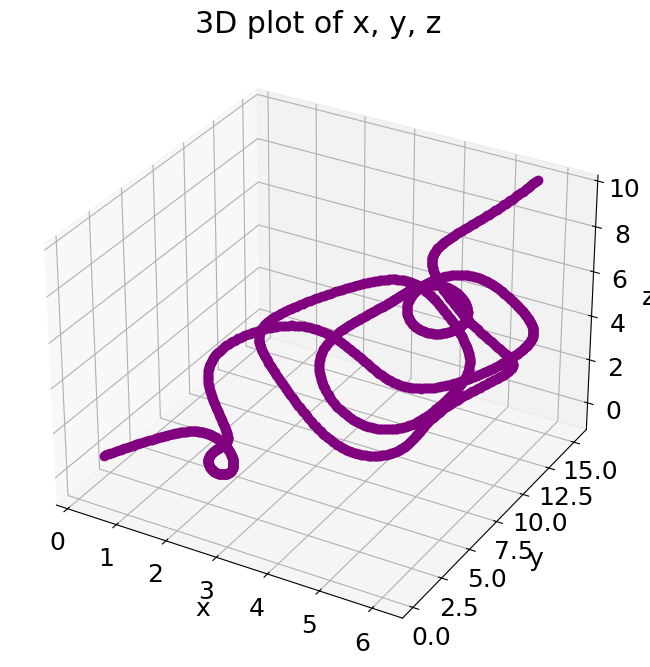

In [3]:
# Plotting the 3D figure
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')
ax_3d.plot(x, y, z, '-o', color='purple')
ax_3d.set(xlabel="x", ylabel="y", zlabel="z")
ax_3d.set_title('3D plot of x, y, z')

plt.show()

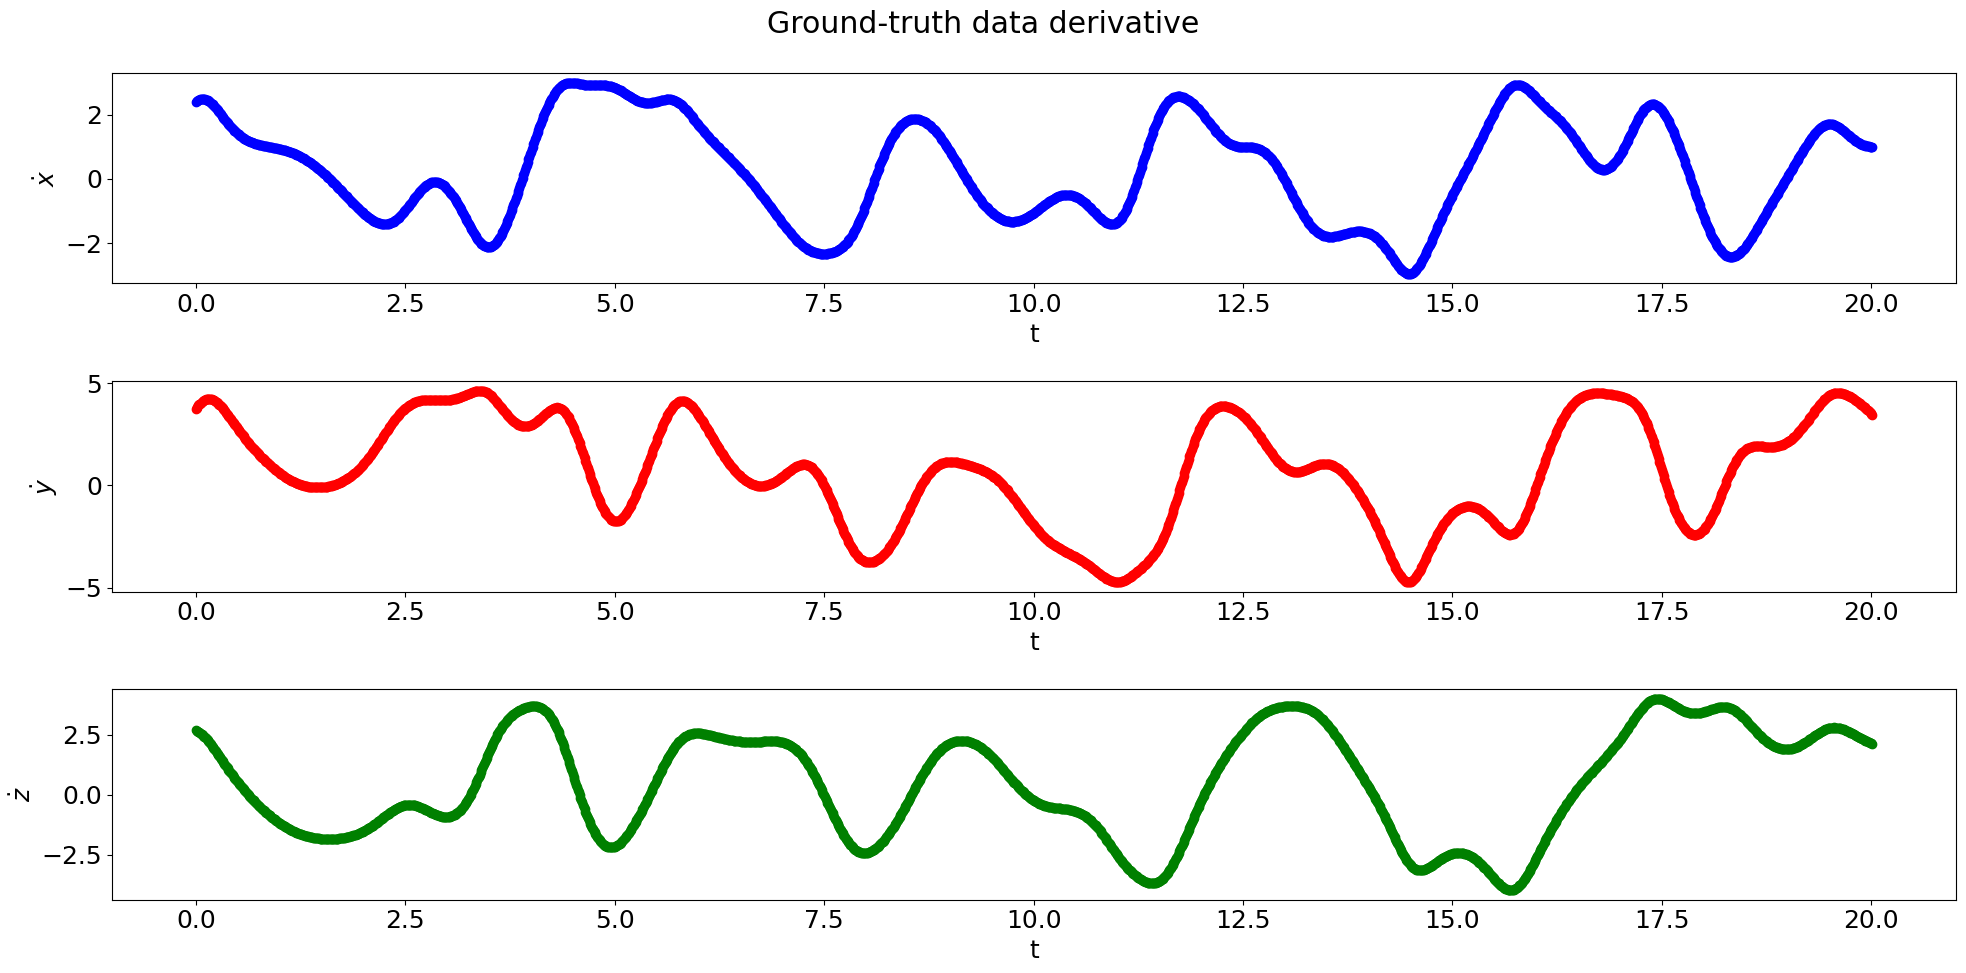

In [4]:
def DERIVATIVE(x, y, z, A,B,C,w1, w2, w3,w4,w5,w6):
    
    dxdt = A*np.sin(w1*z) + C*np.cos(w2*y) 
    dydt = B*np.sin(w3*x) + A*np.cos(w4*z) 
    dzdt = C*np.sin(w5*y) + B*np.cos(w6*x) 
    
    return np.vstack((dxdt, dydt, dzdt)).T

A1A2A3_time_deriv = DERIVATIVE (x, y, z, A,B,C,w1, w2, w3,w4,w5,w6)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
fig.suptitle('Ground-truth data derivative')

# Plot dS/dt
ax[0].plot(t, A1A2A3_time_deriv[:, 0], '-o', color='blue', linewidth=2)
ax[0].set(xlabel="t", ylabel=r"$\dot{x}$")

# Plot dI/dt
ax[1].plot(t, A1A2A3_time_deriv[:, 1], '-o', color='red', linewidth=2)
ax[1].set(xlabel="t", ylabel=r"$\dot{y}$")

# Plot dR/dt
ax[2].plot(t, A1A2A3_time_deriv[:, 2], '-o', color='green', linewidth=2)
ax[2].set(xlabel="t", ylabel=r"$\dot{z}$")

fig.tight_layout()
plt.show()

In [5]:
## SINDy Function Definitions
def poolData(yin,nVars,polyorder):
    n = yin.shape[0]
    yout = np.zeros((n,1))

    # poly order 0
    yout[:,0] = np.ones(n)

    # poly order 1
    for i in range(nVars):
        yout = np.append(yout,yin[:,i].reshape((yin.shape[0],1)),axis=1)

    # poly order 2
    if polyorder >= 2:
        for i in range(nVars):
            for j in range(i,nVars):
                yout = np.append(yout,(yin[:,i]*yin[:,j]).reshape((yin.shape[0],1)),axis=1)

    # poly order 3
    if polyorder >= 3:
        for i in range(nVars):
            for j in range(i,nVars):
                for k in range(j,nVars):
                    yout = np.append(yout,(yin[:,i]*yin[:,j]*yin[:,k]).reshape((yin.shape[0],1)),axis=1)

    return yout

def sparsifyDynamics(Theta,dXdt,lamb,n): #Solves SINDy's L1 regularized convex optimization problem
    Xi = np.linalg.lstsq(Theta,dXdt,rcond=None)[0] # Initial guess: Least-squares

    for k in range(10):
        smallinds = np.abs(Xi) < lamb # Find small coefficients
        Xi[smallinds] = 0                          # and threshold
        for ind in range(n):                       # n is state dimension
            biginds = smallinds[:,ind] == 0
            # Regress dynamics onto remaining terms to find sparse Xi
            Xi[biginds,ind] = np.linalg.lstsq(Theta[:,biginds],dXdt[:,ind],rcond=None)[0]

    return Xi

In [6]:
nums = [2,2.5,3.5,4,4.2,5]              #numbers in the denominator [ sin(pi/a)]
sin_freq = np.pi / np.array(nums)     #frequencies for sin and cos function

x_exp_powers = [ 1.0]          #coefficients for exponential of x [exp(a*x)] 
y_exp_powers = [ 1.0]          #coefficents for exponential of y [exp(a*y)]
z_exp_powers = [ 1.0]          #coefficents for exponential of z [exp(a*z)]


def generate_candidates(x_t, sin_freq, x_exp_powers, y_exp_powers,z_exp_powers):
    """
    Generates polynomial, sine, cosine, and exponential terms, and their combinations
    based on input data. Handles cases where x_t has dimensions (1000, 2) or (1, 2).
    
    Parameters:
    x_t : array-like of shape (N, 3)
        Input data for N data points with three variables (x and y and z).
    sin_freq : list of float
        Frequencies for sine and cosine functions.
    x_exp_powers : list of float
        Coefficients for the exponential of x (exp(a*x)).
    y_exp_powers : list of float
        Coefficients for the exponential of y (exp(a*y)).
    z_exp_powers : list of float
        Coefficients for the exponential of z (exp(a*z)).
    
    Returns:
    All_candidates : array-like
        Combined matrix of polynomial, sine, cosine, and exponential terms.
    """
    
    # Extract x and y from x_t
    x = x_t[:, 0]  # First column is x
    y = x_t[:, 1]  # Second column is y
    z = x_t[:, 2]  # third column is z
    
    # Polynomial terms (modify poolData if needed to handle both shapes)
    polynomial = poolData(x_t, 3, 1)
    poly_candidate = polynomial[:, 1:]
    
    N_sin_freq = len(sin_freq)
    
    # Fourier terms
    Nsize = poly_candidate.shape[1] * N_sin_freq
    sine_candidate = np.zeros((poly_candidate.shape[0], Nsize))
    cos_candidate = np.zeros((poly_candidate.shape[0], Nsize))
    
    k = 0
    for i in range(poly_candidate.shape[1]):
        for j in range(N_sin_freq):
            sine_candidate[:, k] = np.sin(poly_candidate[:, i] * sin_freq[j])
            cos_candidate[:, k] = np.cos(poly_candidate[:, i] * sin_freq[j])
            k += 1
    
    # Fourier terms * polynomial terms
    xsine_candidate = np.zeros((poly_candidate.shape[0], Nsize * poly_candidate.shape[1]))
    xcos_candidate = np.zeros((poly_candidate.shape[0], Nsize * poly_candidate.shape[1]))
    
    k = 0
    for i in range(Nsize):
        for j in range(poly_candidate.shape[1]):
            xsine_candidate[:, k] = sine_candidate[:, i] * poly_candidate[:, j]
            xcos_candidate[:, k] = cos_candidate[:, i] * poly_candidate[:, j]
            k += 1
    
    # Exponential terms
    x_exp_powered = np.array([np.exp(x * p) for p in x_exp_powers]).T  # Shape (N, len(x_exp_powers))
    y_exp_powered = np.array([np.exp(y * p) for p in y_exp_powers]).T  # Shape (N, len(y_exp_powers))
    z_exp_powered = np.array([np.exp(z * p) for p in z_exp_powers]).T  # Shape (N, len(y_exp_powers))
    
    # Combine x and y exponential terms
    all_exp = np.hstack([x_exp_powered, y_exp_powered,z_exp_powered])
    
    # Polynomial * exponential terms
    x_exp_combination = np.concatenate([poly_candidate * x_exp[:, None] for x_exp in x_exp_powered.T], axis=1)
    y_exp_combination = np.concatenate([poly_candidate * y_exp[:, None] for y_exp in y_exp_powered.T], axis=1)
    z_exp_combination = np.concatenate([poly_candidate * z_exp[:, None] for z_exp in z_exp_powered.T], axis=1)
    
    # Combine all exponential terms
    all_exp_combinations = np.hstack([all_exp, x_exp_combination, y_exp_combination, z_exp_combination])
    
    # Combine all candidate terms
    All_candidates = np.hstack((polynomial, sine_candidate, cos_candidate, xsine_candidate, xcos_candidate, all_exp_combinations))
    
    return All_candidates


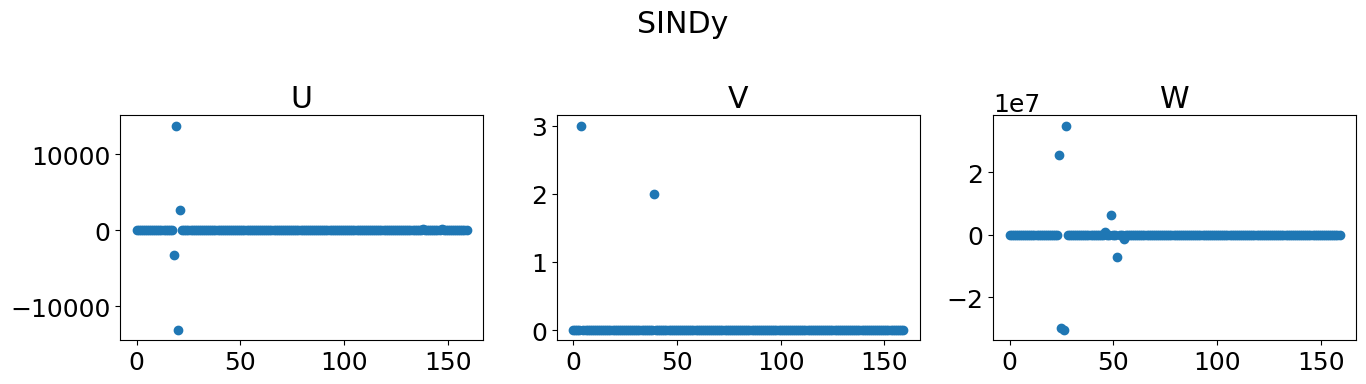

[[     1.49722828414989      -0.270296602653619    -20.597978473270683
   -3232.5253420555846    13770.256575471252    -13157.398119590562
    2636.1492493250908        0.115515875095217     -5.952665354627885
      18.13569612926582     -12.112541422997172      0.879756139296701
      -0.570315000504665      1.901270988187705    163.82017274717455
     132.41850715216862 ]]
[[2.999999999999996 2.               ]]
[[    19194.379617434894           -0.643028756621788
          1.360927152683854         0.278487876245644
        -41.08738058225131       3525.530952462042
   25339475.676539473       -29801625.85451844
  -30443365.755355906        34882840.13265943
     797348.3213051156        6226337.947528073
   -7161996.008297203        -1369859.23671091       ]]
(array([  3,  16,  17,  18,  19,  20,  21,  29,  30,  31,  32,  33,  65,
       135, 138, 147]),)
(array([ 4, 39]),)
(array([ 0, 13, 14, 15, 22, 23, 24, 25, 26, 27, 46, 49, 52, 55]),)


In [7]:
Candidates = generate_candidates (x_t, sin_freq=sin_freq, x_exp_powers=x_exp_powers, y_exp_powers=y_exp_powers, z_exp_powers=z_exp_powers)

lamb = 0.1 # sparsification knob lambda
coeff_matrix = sparsifyDynamics(Candidates, A1A2A3_time_deriv, lamb, 3)

threshold = 0.0005
#****************************************************************************#
loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize =(14, 4))
fig.suptitle('SINDy')

ax[0].plot(coeff_matrix [:, 0], 'o') 
ax[0].set_title('U')


ax[1].plot(coeff_matrix [:, 1], 'o') 
ax[1].set_title('V')


ax[2].plot(coeff_matrix [:, 2], 'o') 
ax[2].set_title('W')


fig.subplots_adjust(top=0.8)
fig.tight_layout()
plt.show()

print(coeff_matrix[np.nonzero(coeff_matrix[:, 0]), 0])
print(coeff_matrix[np.nonzero(coeff_matrix[:, 1]), 1])
print(coeff_matrix[np.nonzero(coeff_matrix[:, 2]), 2])
print(np.nonzero(coeff_matrix[:, 0]))
print(np.nonzero(coeff_matrix[:, 1]))
print(np.nonzero(coeff_matrix[:, 2]))

In [8]:
print(coeff_matrix[:, 0])
print(coeff_matrix[:, 1])
print(coeff_matrix[:, 2])

[     0.                     0.                     0.
      1.49722828414989       0.                     0.
      0.                     0.                     0.
      0.                     0.                     0.
      0.                     0.                     0.
      0.                    -0.270296602653619    -20.597978473270683
  -3232.5253420555846    13770.256575471252    -13157.398119590562
   2636.1492493250908        0.                     0.
      0.                     0.                     0.
      0.                     0.                     0.115515875095217
     -5.952665354627885     18.13569612926582     -12.112541422997172
      0.879756139296701      0.                     0.
      0.                     0.                     0.
      0.                     0.                     0.
      0.                     0.                     0.
      0.                     0.                     0.
      0.                     0.                     0.
      0.

In [9]:
def SINDy_oscillator_deriv(x_y, t):
    out = generate_candidates (np.array(x_y)[np.newaxis, :], sin_freq=sin_freq, x_exp_powers=x_exp_powers, y_exp_powers=y_exp_powers, z_exp_powers=z_exp_powers)@coeff_matrix
    return np.squeeze(out).tolist()

np.random.seed(123)
x0 = (0.5, 0.2, 1.0)
x1_t = integrate.odeint(SINDy_oscillator_deriv, x0, t, rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))
x1, y1, z1 = x1_t.T



/home/arzani/anaconda3/envs/jupy/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


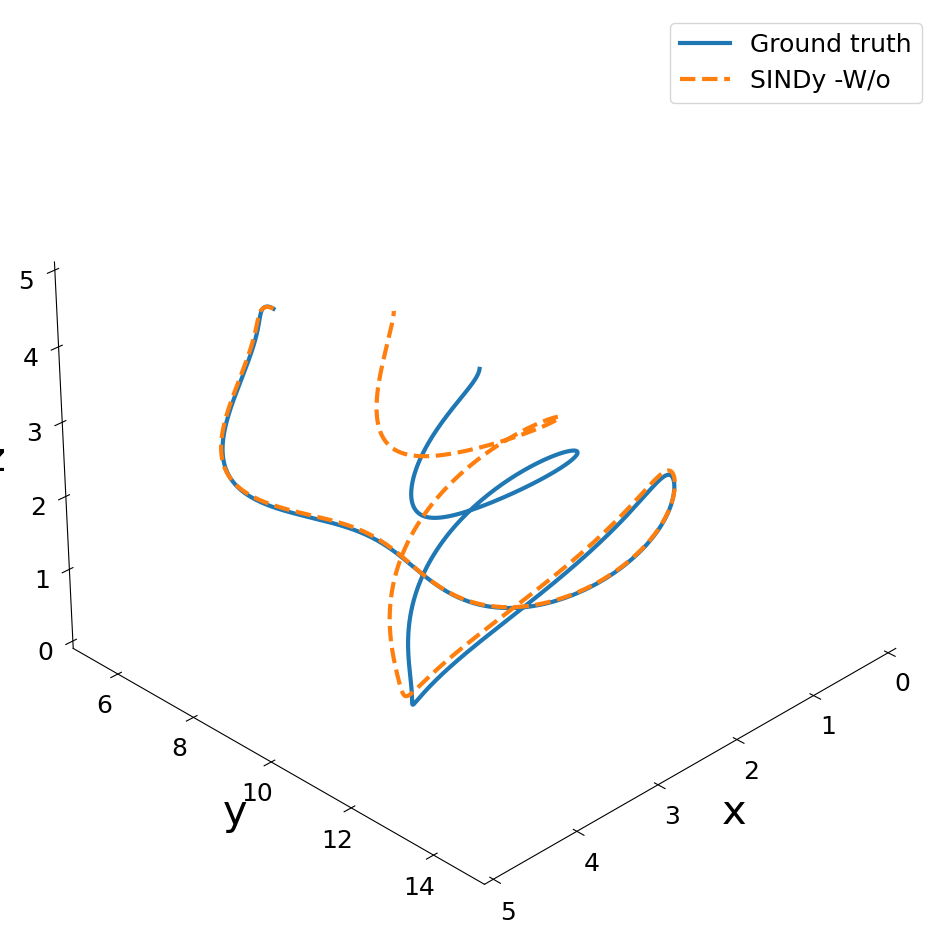

In [10]:
# Create figure and 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plotting the data
ax.plot(x[t<=10],  y[t<=10], z[t<=10], label="Ground truth", linewidth=3)
ax.plot(x1[t<=10], y1[t<=10], z1[t<=10], label="SINDy -W/o", linestyle='--', linewidth=3)

ax.set_xlim(0, 5)
ax.set_ylim(5, 15)
ax.set_zlim(0, 5)

# Adding the legend
ax.legend()

# Setting labels with Times New Roman font
ax.set_xlabel("x", labelpad=8, fontsize = 30)
ax.set_ylabel("y", labelpad=8, fontsize = 30)
ax.set_zlabel("z", labelpad=8, fontsize = 30)


# Remove background pane and borders
ax.xaxis.pane.fill = False  # Remove background pane for x-axis
ax.yaxis.pane.fill = False  # Remove background pane for y-axis
ax.zaxis.pane.fill = False  # Remove background pane for z-axis

# Turn off the pane borders
ax.xaxis.pane.set_edgecolor('none')  # No border for x-axis pane
ax.yaxis.pane.set_edgecolor('none')  # No border for y-axis pane
ax.zaxis.pane.set_edgecolor('none')  # No border for z-axis pane

# Remove grid
ax.grid(False)

ax.view_init(30, 45, 0)
# Save figure to a PDF file
#plt.savefig('Comparison.jpeg', dpi = 1200)

# Display plot
plt.show()

In [11]:
print(np.linalg.norm(x1_t - x_t, ord=2) / x.size)

2.474458779223475e+278
